# The Webscraper

## Websites to be consumed and rationale for extracting web content

For the NLP prototype, a large text corpus (around 8000 elements) is needed that is relevant to the automotive industry. “Eric the Car Guy” is an automotive website containing many forums relating to automotive content. The “Service and Repair Questions Answered Here” (https://www.ericthecarguy.com/forums/forum/stay-dirty-lounge/service-and-repair-questions-answered-here/) forum was used for generating a text corpus via a web scraper. This forum was chosen as there is enough posts to create a large enough corpus, but also the natural language used will align to the NLP project. After a brief analysis of this forum, users were often mentioning the make/model of a problematic car, and what the problem was (specific part fault), which is the exact information needed for this NLP prototype. 

There are many other automotive forums within this website, such as news, sales, or video discussions. Even though parts and car models may be mentioned, the context of the natural language will not be suitable for this NLP prototype. The chosen forum describes problematic cars and their problems, which is why it has been chosen.

## Website/data copyright considerations 

Eric the Car Guy contains a Copyright notice for the use of the information within the website that can be found here: http://new.ericthecarguy.com/terms-of-service/ under the first paragraph in the “Personal Use” section. The scraping of this website is within accordance of the copyright notice as this information is being scraped for learning purposes is only intended for personal use and will not be reproduced in a commercial format. If this prototype is to be given to a development team or used in a commercial environment, then written consent from Eric the Car Guy will be needed. 

## Complexity of content layout/Content extractor to export the important aspects of the data and/or metadata

A screenshot of the main page of the forum and a post can be seen below:

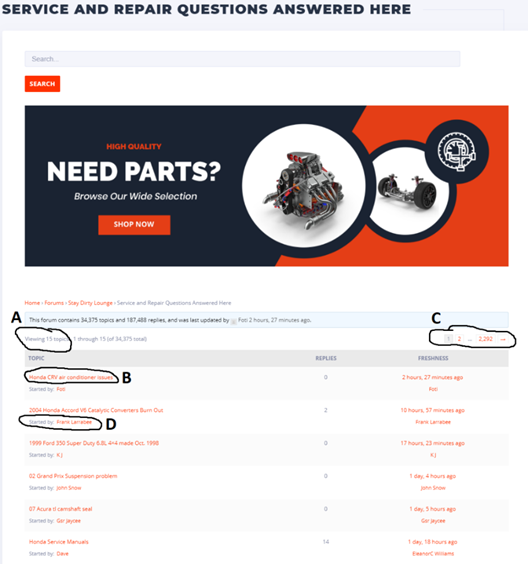

Figure 1  - Main page of the “Service and Repair Questions Answered Here” forum

A – Number of topics (posts) per page

B – Title of post – This is a link to take the end user to that specific post (Fig. 2)

C – Page number(s)

D – Author of the post

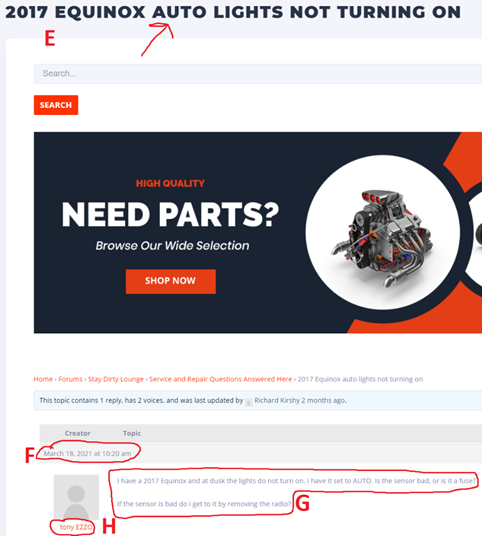

Figure 2 – Forum post in the “Service and Repair Questions Answered Here” forum

E – Post title

F – Date and time posted

G – Description of the post

H – Author of the post

The above-mentioned labels were all used to extract data from the selected data source. Two python packages were used for this, “urllib” and “beautifulsoup”. Urllib is used for opening the desired page, and beautifulsoup is used for parsing the html construction of the page and extracting/saving the desired data form the webpage. The general URL for the forum (https://www.ericthecarguy.com/forums/forum/stay-dirty-lounge/service-and-repair-questions-answered-here/) changes depending on which page is being accessed. The general URL directs a user to page 1, but if any other page is being accessed a “/page/n/” is added to the URL (https://www.ericthecarguy.com/forums/forum/stay-dirty-lounge/service-and-repair-questions-answered-here/page/2/ for page 2). The urllib.request.open function is used accordingly to open the correct URL for scraping the page.

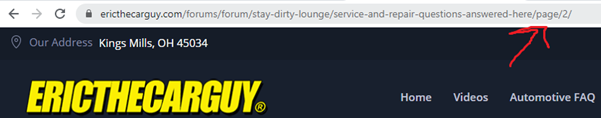

Figure 3 – URL changing when a different page is accessed

Once the page has been opened, the page is read by the urllib.request.read and this is saved to a variable, and the page is closed. Beautifulsoup’s page_html function is then used to parse this page into its html construction. From this page, the author of the post is extracted and saved. Author names are kept in a “span” tag with class of “bbp-topic-srtated-by”, these are found with beautifulsoup’s findAll function. Within this span tag, an “a” tag is embedded, which has an “img” tag embedded within that. Within the “img” tag, an alt value has the author’s name. Fig. 4 shows this construction. 


In [5]:
"""Example to show the extrcation of an Author of a post"""
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

general_url = "https://www.ericthecarguy.com/forums/forum/stay-dirty-lounge/service-and-repair-questions-answered-here/"
# opening connection, grabbing the page
uClient = uReq(general_url)
page_html = uClient.read()
uClient.close()

# html parsing
page_soup = soup(page_html, "html.parser")
# find all span tags with a class of bbp-topic-started-by 
person_posted = page_soup.findAll("span", {"class": "bbp-topic-started-by"}) # this returns 15 results
print(len(person_posted))
# extract author name from the alt value in the img tag
author_name = person_posted[0].a.img["alt"]  # indexed depending on the article, 0 for 1st article, 14 for the 15th article
print(author_name)

15
Billy Ramirez


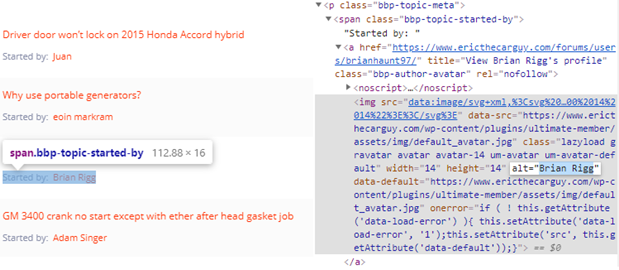

Figure 4 – The Author name embedded in the html structure

The url to take a user from the main forum page to a specific post is embedded in each post title. This url is needed to extract and save the other desired text items to the corpus. This url to a specific post is embedded in an li tag with a class of “bbp-topic-title” and is found with the findAll function. Within this, an a tag is embedded which has a href attribute. This href attribute contains the url to that specific post. This url is extracted using beautifulsoup, and the new page is opened with the urllib.request.open function, as before.

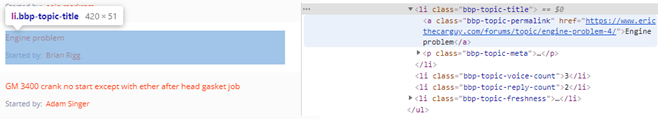

Figure 5 – The link to the post embedded in the html structure

In [6]:
"""Example to show the extraction of a URL to a specific post. Uses same page as previous block of code"""

# grabs each topic
# find all where class is bhp-topic-title
containers = page_soup.findAll("li", {"class": "bbp-topic-title"})
# inspect each container
print(containers[1])
# inspect the a tag
container = containers[1]  # this is indexed depending on the article
new_url = container.a['href']
# get the url that references what the user has said
print("The new url is {}".format(new_url))

<li class="bbp-topic-title">
<a class="bbp-topic-permalink" href="https://www.ericthecarguy.com/forums/topic/honda-crv-element-ball-joint/">honda crv/element ball joint</a>
<p class="bbp-topic-meta">
<span class="bbp-topic-started-by">Started by: <a class="bbp-author-avatar" href="https://www.ericthecarguy.com/forums/users/billybee/" rel="nofollow" title="View Billy Ramirez's profile"><noscript><img alt="Billy Ramirez" class="gravatar avatar avatar-14 um-avatar um-avatar-default" data-default="https://www.ericthecarguy.com/wp-content/plugins/ultimate-member/assets/img/default_avatar.jpg" height="14" onerror="if ( ! this.getAttribute('data-load-error') ){ this.setAttribute('data-load-error', '1');this.setAttribute('src', this.getAttribute('data-default'));}" src="https://www.ericthecarguy.com/wp-content/plugins/ultimate-member/assets/img/default_avatar.jpg" width="14"/></noscript><img alt="Billy Ramirez" class="lazyload gravatar avatar avatar-14 um-avatar um-avatar-default" data-default

The post date, desciption and author are extracted from each post page and added to the corpus. The post title is contained within the first h1 tag present on the page. Within this tag, a span tag has a text attribute which is the post title, which is extracted and stored (Shown in Fig. 6). The post description is contined in a div tag with class “bbp-topic-content” and is found with the findAll function. Within this div tag, a list of p tags have a text attribute which is the description of the post (Shown in Fig. 7). These p tags are extracted, concatenated together and saved. The date of the post is contained as a text attribute within a span tag with a class of “bbp-topic-post-date” and is found with the findAll function. The format of the extracted date is “Month Day, Year at 00:00 pm/am” (Shown in Fig. 8). 

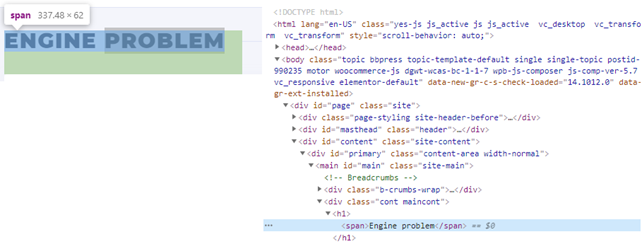

Figure 6 – HTML location of the post title

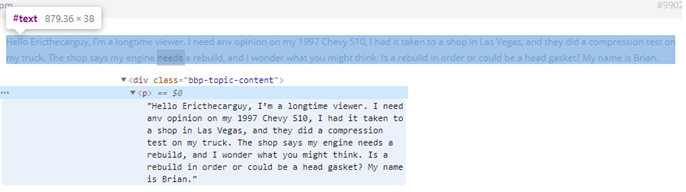

Figure 7 – HTML location of the post description

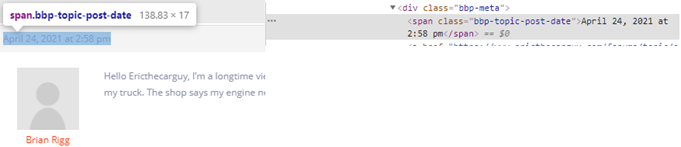

Figure 8 – HTML location of the date of the post

In [7]:
"""Code to show extraction of Post Date, Title and Description, using the same post extracted from the previous 
block of code"""

# opening connection to the specific post, grabbing the page
uClient = uReq(new_url)
new_page_html = uClient.read()
uClient.close()

new_page_soup = soup(new_page_html, "html.parser")

# extract the title
forum_title = new_page_soup.h1.span.text
print("Title is: {}".format(forum_title))

# extract the article description
new_containers = new_page_soup.findAll("div", {"class": "bbp-topic-content"})

# text is contained in p tags. Concatenate these together
text = new_containers[1].find_all('p')
description = ""

for i in range(len(text)):
    # extracts the raw text from the tag
    current_decription = text[i].text
    description = description + current_decription
print("Description is: {}".format(description))

date_container = new_page_soup.findAll("span", {"class": "bbp-topic-post-date"})
date_posted = date_container[0].text
print("Date of post is: {}".format(date_posted))

Title is: honda crv/element ball joint
Description is: Hi guys/girls,Im just wondering if the 2nd gen honda crv have identical drivetrain/suspension parts as there 2003-2005 element counter part? On ericthecarguys balljoint video for his element, he used a moog k500004 balljoing that comes with a snap ring. The k80223 for the CRV does not have snapring.Also on the moog webpage and RA, the k500004 fits 2003-2011 Element 2wd/4wd and the K80223 to fit 02-06 CRV/ 03-05 element 2wd/4wdI prefer to have a snap ring on my CRV, i had a bad experience with a ball joint separating in the past.IF they are the same I rather buy the moog k500004.
Date of post is: May 29, 2021 at 2:34 pm


As there are 15 posts per page, whenever the findAll function is used on the main page, 15 results are returned. A for loop is used to iterate over the returned results and extract the desired information from each post accordingly. From each post, the four variables that were saved are: Date Posted, Author, Title and Description. These 4 variables were written to a csv file named “scraped_info.csv” to be used later (Shown in Fig. 9). 

The above web scraper was used on roughly 500 pages of the selected forum, and roughly 7500 posts were scraped to generate a corpus for the NLP prototype. The following table shows the data schema from the outputted scraped variables:

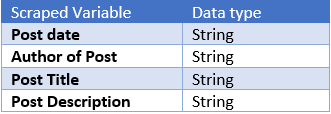

## Content Coverage of extracted data/Data Schema of output file

The above table helps to describe the content coverage of the scraped data. When analysing the above table, the scraped variables do not contain any subtypes within it, all variables are string variables, which is acceptable for the proposed NLP prototype. The data can be left as strings and no vectorisation is needed as no machine learning is needed for the prototype. Approximately 34,000 posts have been made to this forum, therefore roughly 22% of the available content was extracted which is sound data coverage for the NLP prototype. Some posts caused the scraper to crash due to a URL being posted or a form of text hat was not accepted, these posts were passed over.  

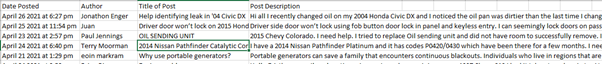

Figure 9 – Overview of the scraped data

## Methodology of processing, cleaning, and storing harvested data for NLP tasking

For storing the data, minor cleaning took place. As the data is saved in a csv format, all scraped variables have their commas removed to not corrupt the data saving process. Any double spaces were reduced to a single space, and any “\r”  or “\n” characters were removed as this also corrupted the data saving process. Each post was written to the desired file one post at a time, therefore each attribute that needed to be saved was separated by a comma to save the file as a csv file. 


In [8]:
"""Code to show the cleaning of the data that is harvested before it is saved to csv file"""
date_posted = date_posted.replace(", ", " ")

forum_title = forum_title.replace(",", " ")
forum_title = forum_title.replace("  ", " ")

description = description.replace("\r\n", " ")
description = description.replace(",", " ")
description = description.replace("  ", " ")
description = description.replace("\n", "")

written_variables = date_posted.replace(",", " ") + "," + author_name + "," + forum_title.replace(",", " ") + "," + description + "\n"
print("Variables written to csv file: {}".format(written_variables))

Variables written to csv file: May 29 2021 at 2:34 pm,Billy Ramirez,honda crv/element ball joint,Hi guys/girls Im just wondering if the 2nd gen honda crv have identical drivetrain/suspension parts as there 2003-2005 element counter part? On ericthecarguys balljoint video for his element he used a moog k500004 balljoing that comes with a snap ring. The k80223 for the CRV does not have snapring.Also on the moog webpage and RA the k500004 fits 2003-2011 Element 2wd/4wd and the K80223 to fit 02-06 CRV/ 03-05 element 2wd/4wdI prefer to have a snap ring on my CRV i had a bad experience with a ball joint separating in the past.IF they are the same I rather buy the moog k500004.



## Metadata supplementation

For this NLP prototype, conventional supplementation of metadata from another source is not needed. The data that was harvested from the selected source is more than sufficient for this task. Supplementing metadata such as more information on car parts/makes of cars can be a step taken for implementing this project with a development team. This could aid a machine learning or recommender system approach with metadata supplementation.

## Summary and visualisation of the harvested data.

A preliminary exploratory data analysis occurred with the following graphs. Fig. 10 and Fig. 11 are word clouds of the scraped data from the titles of posts and descriptions of posts, respectively.

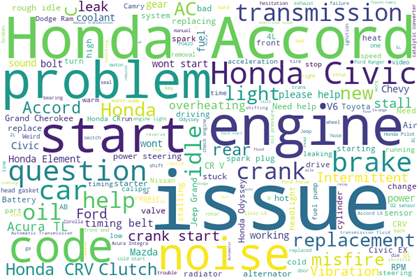

Figure 10 – Word cloud of the words found in the titles of posts

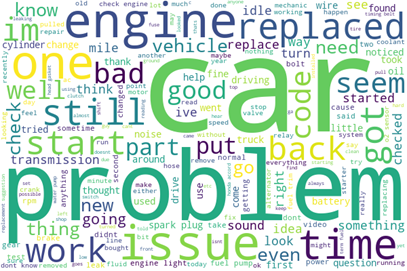

Figure 11 – Word cloud of the words found in the descriptions of posts

The above word clouds were generated after stop word removal to show more meaningful data. It is shown that makes and models of cars are more frequent in titles of posts, rather than in descriptions. Also, car parts are present in both titles and descriptions of posts, but words describing the problem are more frequent in descriptions of posts. These word clouds emphasise that the scraped data is relevant to the overall project, as the words “problem” and “issue” are quite frequent.

Bar graphs of the twenty most frequent words in titles and descriptions can be seen below in Fig. 12 and Fig. 13 respectively, for better understanding of the dataset.  

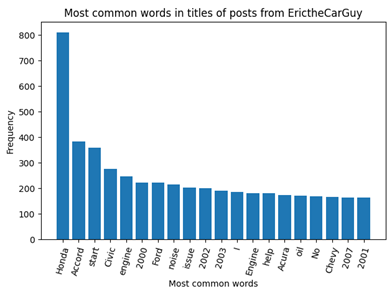

Figure 12 – Most common words in titles of posts

[('Honda', 810), ('Accord', 384), ('start', 359), ('Civic', 275), ('engine', 247), ('2000', 223), ('Ford', 222), ('noise', 216), ('issue', 203), ('2002', 200), ('2003', 191), ('I', 186), ('Engine', 182), ('help', 182), ('Acura', 174), ('oil', 171), ('No', 169), ('Chevy', 167), ('2007', 164), ('2001', 164)]

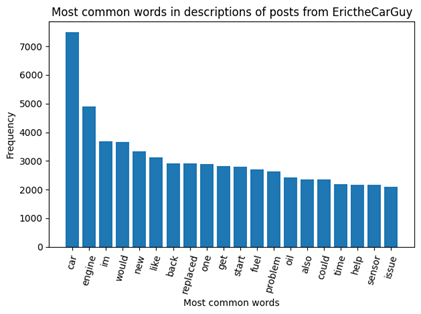

Figure 13 – Most common words in descriptions of posts

[('car', 7486), ('engine', 4902), ('im', 3682), ('would', 3652), ('new', 3336), ('like', 3124), ('back', 2923), ('replaced', 2907), ('one', 2900), ('get', 2822), ('start', 2799), ('fuel', 2714), ('problem', 2633), ('oil', 2419), ('also', 2359), ('could', 2347), ('time', 2196), ('help', 2179), ('sensor', 2160), ('issue', 2102)]



## Evidence of working webscraper - Webscraper in action

In [4]:
"""File that scrapes the Eric the Car guy. The specific page that is scraped is a service and repairs forum.
This forum and page was chosen as this page will mention specifc car brands, models, hat part is failing and
verbs associated with the parts that are failing."""

import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import tqdm

general_url = "https://www.ericthecarguy.com/forums/forum/stay-dirty-lounge/service-and-repair-questions-answered-here/"

# file to save info to. For intial webscraper, code was saved to scraped_info.csv
filename = "example.csv"
f = open(filename, "w")

headers = "Date Posted,Author,Title of Post,Post Description\n"

# write the headers to the file
f.write(headers)

# range of for loop is page start and page end, to scrape the desired amount of pages only,
# i scraped the page website bit by bit, and scraped 500 pages
for j in tqdm.tqdm(range(1, 2)):
    print("Up to page {}".format(j))
    if j != 1:
        current_url = general_url + "page/" + "{}".format(j) + "/"
    else:
        current_url = general_url
    # as there is 15 posts per page, iterate over each post accordingly
    for i in range(0, 15):

        try:
            # opening connection, grabbing the page
            uClient = uReq(current_url)
            page_html = uClient.read()
            uClient.close()

            # html parsing
            page_soup = soup(page_html, "html.parser")

            # grabs each topic
            # find all where class is bhp-topic-title
            containers = page_soup.findAll("li", {"class": "bbp-topic-title"})
            # inspect each container
            # inspect the a tag
            container = containers[i + 1] 
            # this is indexed depending on the article. Position 0 is not the first post title, which is why 1 is added to 
            # the index
            new_url = container.a['href']
            # get the url that references what the user has said
            
            #extract the author's name
            person_posted = page_soup.findAll("span", {"class": "bbp-topic-started-by"})
            author_name = person_posted[i].a.img["alt"]  # indexed depending on the article

            # opening connection, grabbing the page
            uClient = uReq(new_url)
            new_page_html = uClient.read()
            uClient.close()
            new_page_soup = soup(new_page_html, "html.parser")
            # extract the title
            forum_title = new_page_soup.h1.span.text

            # extract the article description
            new_containers = new_page_soup.findAll("div", {"class": "bbp-topic-content"})
            # text is contained in p tags
            text = new_containers[1].find_all('p')
            
            # concatenate the list of p tags for the description
            description = ""
            for i in range(len(text)):
                # extracts the raw text from the tag
                current_decription = text[i].text
                description = description + current_decription

            date_container = new_page_soup.findAll("span", {"class": "bbp-topic-post-date"})
            date_posted = date_container[0].text
        except:
            pass

        # some users might post a url to another site, this causes the program to crash. If this occurs, simply pass
        # over the post and disregard it.
        try:

            date_posted = date_posted.replace(", ", " ")

            forum_title = forum_title.replace(",", " ")
            forum_title = forum_title.replace("  ", " ")

            description = description.replace("\r\n", " ")
            description = description.replace(",", " ")
            description = description.replace("  ", " ")
            description = description.replace("\n", "")

            f.write(date_posted.replace(",", " ") + "," + author_name + "," + forum_title.replace(",", " ") + "," +
                    description + "\n")
            
        except:
            pass

print("Last post that was scraped: URL: {}, Date Posted: {}".format(new_url, date_posted))
print("Author Name: {}, Post Title: {}".format(author_name, forum_title))
print("Description: {}".format(description))
f.close()
# close the file

  0%|          | 0/1 [00:00<?, ?it/s]

Up to page 1


100%|██████████| 1/1 [01:07<00:00, 67.45s/it]

Last post that was scraped: URL: https://www.ericthecarguy.com/forums/topic/honda-crv-air-conditioner-issues/, Date Posted: May 20 2021 at 5:43 pm
Author Name: Foti, Post Title: Honda CRV air conditioner issues
Description: My uncles’s 2009 Honda CRV has an air conditioner that doesn’t work most of the times. He took it to a mechanic that replaced the compressor. I really don’t think it’s the compressor. I’m not a mechanic but shouldn’t the radiator fan turn on when the air conditioner is on? The radiator fan will not turn on when I turn on the air conditioner. The radiator fan does work as I saw it turn on on a warm day when it was sitting for a while and then turned off after a minute. So I’m pretty sure the radiator fan is fine. I’m pretty sure my problem lies with a bad relay or controller or something. Is there a relay between the air conditioner and radiator fan?


### Current page that was scraped from forum in above block of code

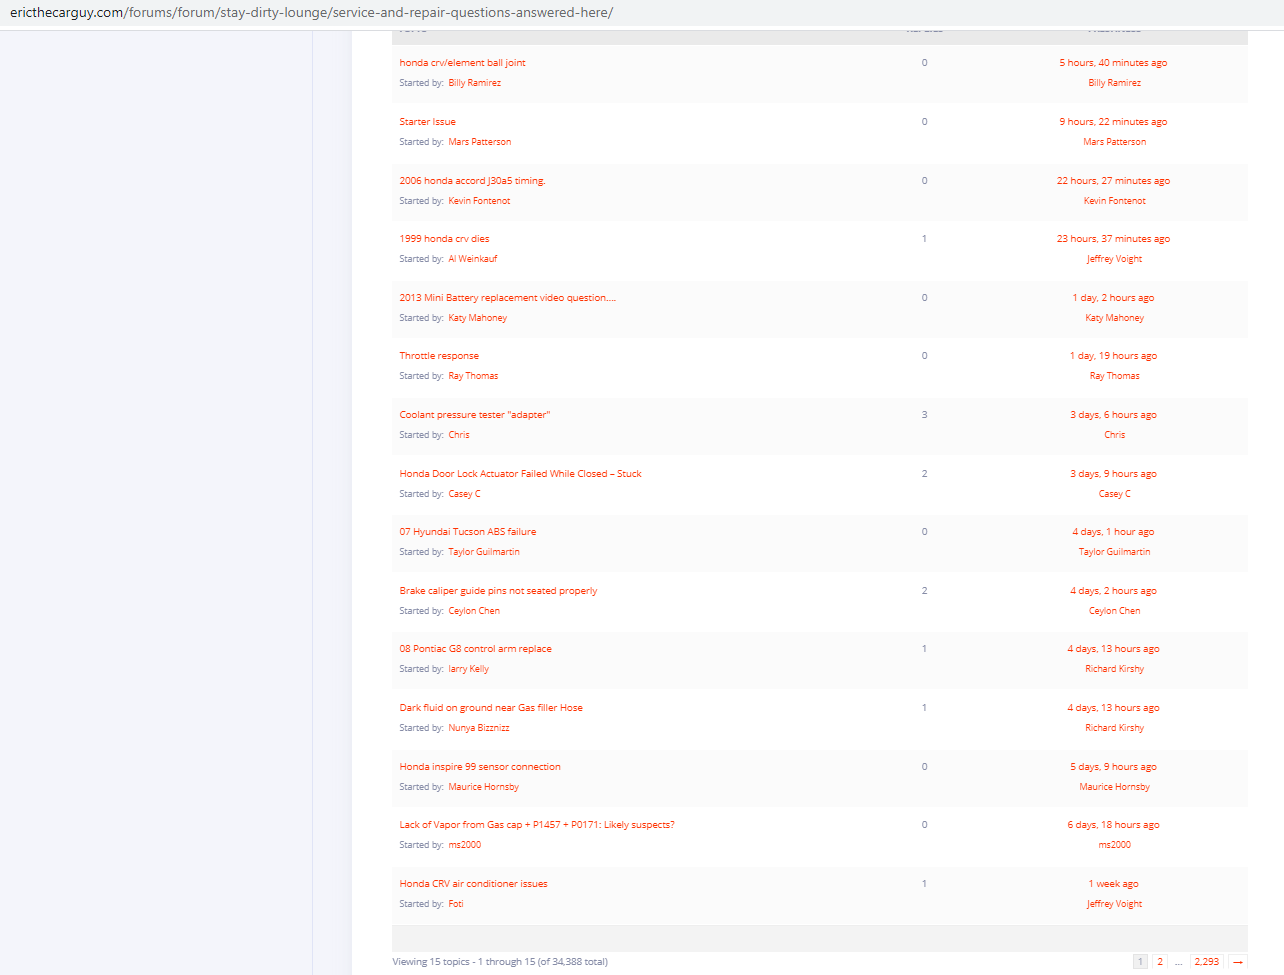

### Screenshot of example.csv to show proof of working webscraper:

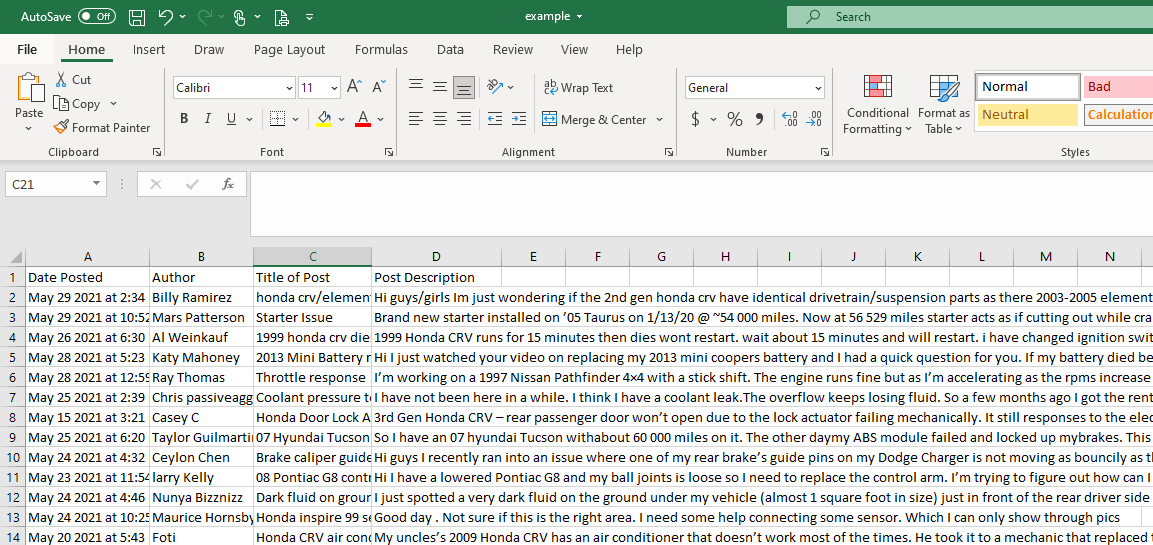

## Code to Generate Graphs

[('Honda', 808), ('and', 518), ('on', 484), ('Accord', 375), ('to', 367), ('the', 366), ('a', 365), ('start', 331), ('no', 314), ('in', 301), ('Civic', 269), ('when', 265), ('engine', 236), ('Ford', 222), ('2000', 219), ('with', 212), ('of', 208), ('not', 197), ('2002', 196), ('noise', 194)]
[('the', 70500), ('i', 40856), ('and', 33252), ('to', 29225), ('a', 27662), ('it', 24930), ('is', 15611), ('on', 12984), ('of', 11232), ('in', 10916), ('have', 10220), ('that', 9925), ('my', 9322), ('with', 8784), ('but', 8775), ('for', 8647), ('was', 8182), ('this', 7667), ('car', 6816), ('when', 6694)]
[('Honda', 810), ('Accord', 384), ('start', 359), ('Civic', 275), ('engine', 247), ('2000', 223), ('Ford', 222), ('noise', 216), ('issue', 203), ('2002', 200), ('2003', 191), ('I', 186), ('Engine', 182), ('help', 182), ('Acura', 174), ('oil', 171), ('No', 169), ('Chevy', 167), ('2007', 164), ('2001', 164)]
[('car', 7486), ('engine', 4902), ('im', 3682), ('would', 3652), ('new', 3336), ('like', 3124

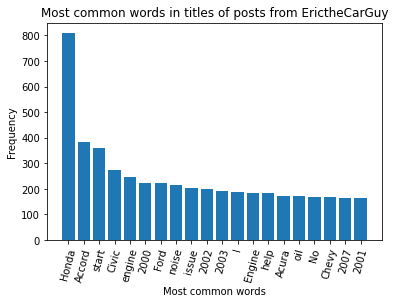

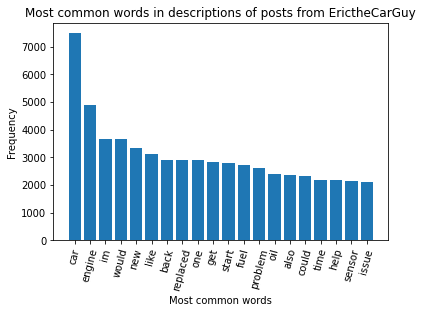

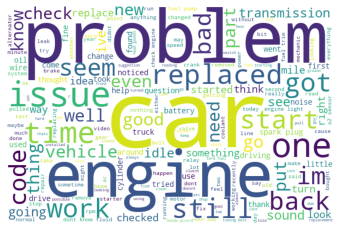

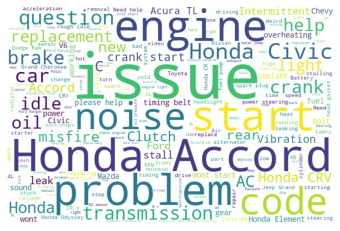

In [26]:
"""Block of code to show how graphs and wordclouds were created"""

import operator
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string


def get_top_words(input_string):
    """A function to count the most common words in a string"""
    # count the words
    top_words = Counter(input_string)
    # order the words in descending order
    top_words_ordered = sorted(top_words.items(), key=operator.itemgetter(1), reverse=True)
    # keep the top twenty elements
    top_twenty = top_words_ordered[0:20]
    print(top_twenty)
    return top_twenty


def listToString(s):
    """A function to turn a list to string. normally the .join function can be used, but
    catching erros in this was difficult, so this function is made"""
    # initialize an empty string
    str1 = ""

    # traverse in the string
    for ele in s:
        try:
            str1 = str1 + " " + ele
        except:
            pass

        # return string
    return str1


def column_to_list(column):
    """Turn a column of a dataframe to a list"""
    column = column.tolist()
    column_string = ""
    for i in range(len(column)):
        current_row = column[i]
        try:
            column_string = column_string + current_row + " "
        except:
            pass
    column_list = column_string.split()
    return column_list


def remove_stop_words(dataset):
    """Remove stop words from a list"""
    for n in range(len(dataset)):
        try:
            # concatenate the title and keywords
            current_title = dataset.iloc[n]["Title of Post"]
            current_description = dataset.iloc[n]["Post Description"]

            token_title = word_tokenize(current_title)
            token_description = word_tokenize(current_description)
            filtered_title = []
            filtered_description = []

            for word in token_description:
                if word not in stop_words:
                    filtered_description.append(word)

            filtered_description = listToString(filtered_description)

            for word in token_title:
                if word not in stop_words:
                    filtered_title.append(word)

            filtered_title = listToString(filtered_title)

            dataset.iloc[n]["Title of Post"] = filtered_title
            dataset.iloc[n]["Post Description"] = filtered_description

        except:
            pass

    return dataset


def plot_most_common_words(plotting_string, method):
    """Plot the most common words in a string"""
    top_twenty_after_stop = get_top_words(plotting_string)
    top_twenty_after_stop_dict = dict(top_twenty_after_stop)
    keys = top_twenty_after_stop_dict.keys()
    values = top_twenty_after_stop_dict.values()
    plt.bar(keys, values)
    plt.xticks(rotation=75)
    plt.xlabel("Most common words")
    plt.ylabel("Frequency")
    plt.title("Most common words in {} of posts from ErictheCarGuy".format(method))
    plt.show()


scraped_data = pd.read_csv("scraped_info.csv")

# keep the desired columns
scraped_data = scraped_data[["Title of Post", "Post Description"]]

# removes non UTF-8 encoding of any scraped information
scraped_data["Title of Post"] = scraped_data["Title of Post"].str.encode("ascii", "ignore").str.decode("ascii")
scraped_data["Post Description"] = scraped_data["Post Description"].str.encode("ascii", "ignore").str.decode("ascii")

# change everything in descriptions dataframe to lowercase. Don't change titles dataframe to lowercase as it will not
# be changed for NER analysis
scraped_data["Post Description"] = scraped_data["Post Description"].str.lower()

# extract titles
titles = scraped_data["Title of Post"]
titles_list = column_to_list(titles)

# extract descriptions
descriptions = scraped_data["Post Description"]
descriptions_list = column_to_list(descriptions)

# get the top 20 words for titles and descriptions
top_twenty_titles = get_top_words(titles_list)
top_twenty_descriptions = get_top_words(descriptions_list)

# set stopwords. Removes punctuation marks and individual letters from dataset
stop_words = set(stopwords.words('english'))
engl_alphabet = string.ascii_lowercase
engl_alphabet = list(engl_alphabet)
stop_words.update(engl_alphabet)
stop_words.add('.')
stop_words.add(',')
stop_words.add('?')
stop_words.add('(')
stop_words.add(')')
stop_words.add('!')
stop_words.add(':')

# remove stop words
scraped_data = remove_stop_words(scraped_data)
filtered_titles = scraped_data["Title of Post"]
filtered_titles = column_to_list(filtered_titles)
filtered_descriptions = scraped_data["Post Description"]
filtered_descriptions = column_to_list(filtered_descriptions)

# plot the most common words
plot_most_common_words(filtered_titles, "titles")
plot_most_common_words(filtered_descriptions, "descriptions")

# concatenate descriptiuons together for wordcloud
desc_string = ""
for description in descriptions:
    try:
        desc_string = desc_string + " " + description
    except:
        pass
wc = WordCloud(background_color='white', height=400, width=600)
wc.generate(desc_string)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('wordcloud_descriptions.png')

# concatenate titles together for wordcloud
title_string = ""
for title in titles:
    try:
        title_string = title_string + " " + title
    except:
        pass
wc = WordCloud(background_color='white', height=400, width=600)
wc.generate(title_string)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('wordcloud_titles.png')